# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# # Предварительный план

**1)** Изучить данные и общую информацию.

**2)** Сделать предобработку данных:

        - Изучить пропуски, сделать выводы;
        - Заполнить пропуски там, где это уместно;
        - Изменить типы данных там, где требуется.
        
**3)** Посчитать и добавить в таблицу:

        - Цену квадратного метра;
        - День недели, месяц и год публикации объявления;
        - Этаж квартиры; варианты — первый, последний, другой;
        - Соотношение жилой и общей площади, а также отношение площади кухни к общей.
        
**4)** Провести исследовательский анализ данных:

        - Изучить следующие параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы для каждого параметра.
        - Изучить время продажи квартиры. Построить гистограмму. Посчитать среднее и медиану. Описать, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
        - Убрать редкие и выбивающиеся значения. Описать, какие особенности обнаружили.
        - Какие факторы больше всего влияют на стоимость квартиры? Изучить, зависит ли цена от площади, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года.
        - Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце **locality_name**.
        - Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделить квартиры в Санкт-Петербурге (**locality_name**). Задача — выяснить, какая область входит в центр. Создать столбец с расстоянием до центра в километрах: округлить до целых значений. После этого посчитать среднюю цену для каждого километра. Построить график: он должен показывать, как цена зависит от удалённости от центра. Определить границу, где график сильно меняется, — это и будет центральная зона.
        - Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделать выводы. Отличаются ли они от общих выводов по всей базе?
        
**5)** Описание данных:

        Данные содержат большое количество столбцов с различными параметрами:
        - airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
        - balcony — число балконов
        - ceiling_height — высота потолков (м)
        - cityCenters_nearest — расстояние до центра города (м)
        - days_exposition — сколько дней было размещено объявление (от публикации до снятия)
        - first_day_exposition — дата публикации
        - floor — этаж
        - floors_total — всего этажей в доме
        - is_apartment — апартаменты (булев тип)
        - kitchen_area — площадь кухни в квадратных метрах (м²)
        - last_price — цена на момент снятия с публикации
        - living_area — жилая площадь в квадратных метрах (м²)
        - locality_name — название населённого пункта
        - open_plan — свободная планировка (булев тип)
        - parks_around3000 — число парков в радиусе 3 км
        - parks_nearest — расстояние до ближайшего парка (м)
        - ponds_around3000 — число водоёмов в радиусе 3 км
        - ponds_nearest — расстояние до ближайшего водоёма (м)
        - rooms — число комнат
        - studio — квартира-студия (булев тип)
        - total_area — площадь квартиры в квадратных метрах (м²)
        - total_images — число фотографий квартиры в объявлении
        
        Имеются значения NaN и значения, не приведённые к удобочитаемому виду. Далее, по пунктам изучу данные более детально.

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
pd.set_option('display.max_columns', 50)
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [6]:
df.sample(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23369,19,20900000.0,129.0,2016-05-13T00:00:00,3,3.02,8.0,81.0,7,NaN,False,False,19.0,1.0,Санкт-Петербург,22913.0,2454.0,0.0,NaN,0.0,NaN,188.0
19965,2,2874906.0,55.0,2017-01-24T00:00:00,2,NaN,15.0,25.0,5,NaN,False,False,11.0,0.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,45.0
4843,9,5500000.0,52.0,2016-06-21T00:00:00,2,NaN,12.0,30.0,9,NaN,False,False,10.0,1.0,Санкт-Петербург,35717.0,12306.0,1.0,397.0,1.0,477.0,83.0
18932,8,5000000.0,55.0,2016-04-28T00:00:00,3,NaN,5.0,40.0,5,False,False,False,6.0,0.0,Санкт-Петербург,39812.0,9072.0,2.0,378.0,0.0,NaN,60.0
14738,7,2750000.0,34.0,2017-10-17T00:00:00,1,NaN,26.0,15.0,23,NaN,False,False,9.0,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,107.0
217,19,6550000.0,79.0,2018-04-05T00:00:00,4,2.60,9.0,55.3,6,NaN,False,False,10.0,1.0,Санкт-Петербург,49666.0,16010.0,0.0,NaN,0.0,NaN,122.0
1911,3,3900000.0,42.5,2019-04-26T00:00:00,1,2.78,25.0,19.5,19,False,False,False,12.5,2.0,Санкт-Петербург,15839.0,14635.0,0.0,NaN,1.0,1036.0,NaN
1605,18,5200000.0,49.0,2019-03-17T00:00:00,2,2.50,9.0,30.8,3,NaN,False,False,6.6,1.0,Санкт-Петербург,23226.0,15840.0,0.0,NaN,0.0,NaN,NaN
11455,7,4600000.0,41.0,2019-04-22T00:00:00,1,2.70,12.0,20.0,4,NaN,False,False,10.0,NaN,Санкт-Петербург,34781.0,12851.0,1.0,650.0,1.0,682.0,NaN
5937,11,4550000.0,43.0,2017-09-07T00:00:00,1,NaN,16.0,19.8,15,NaN,False,False,9.5,0.0,Санкт-Петербург,32672.0,13836.0,0.0,NaN,0.0,NaN,35.0


In [7]:
df.tail(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,False,False,15.60,NaN,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,False,False,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23686,8,3300000.0,31.00,2017-04-29T00:00:00,1,2.55,9.0,18.0,6,NaN,False,False,6.50,0.0,Санкт-Петербург,11751.0,11602.0,1.0,140.0,1.0,317.0,193.0
23687,6,3200000.0,39.00,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,False,False,11.00,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23688,19,9200000.0,101.00,2019-04-01T00:00:00,3,3.05,15.0,63.0,12,NaN,False,False,15.00,NaN,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.0
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,False,False,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0


**Вывод**

1) Дата не записана в удобочитаемом формате, стоит её преобразовать в соответствующий формат - datetime;

2) Большое количество пропусков в столбце с высотой потолков **ceiling_height**, стоит заполнить пропуски медианным значением (предположительно);

3) Значения в столбце **floors_total** заменю целочисленным типом;

4) Значения в столбце **living_area** пропущены, скорее всего, по причине того, что не была посчитана жил.площадь, а известна только площадь всей квартиры;

5) Большое число пропусков в столбце **is_apartment** предположительно можно охарактеризовать тем, что апартаменты - жилое или не жилое помещение, а квартира - полностью жил.площадь с несколькими комнатами.

## Предобработка данных

In [8]:
df['total_images'].value_counts()

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
29       3
50       3
27       2
35       2
30       2
31       2
39       1
25       1
42       1
37       1
Name: total_images, dtype: int64

In [9]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [10]:
df[df['total_images'] == 50]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9778,50,11000000.0,87.0,2017-10-25T00:00:00,2,NaN,25.0,32.5,11,NaN,False,False,31.0,5.0,Санкт-Петербург,9586.0,11649.0,0.0,NaN,0.0,NaN,3.0
12667,50,20500000.0,76.0,2017-12-10T00:00:00,3,NaN,20.0,47.0,16,NaN,False,False,29.0,NaN,Санкт-Петербург,50812.0,16141.0,0.0,NaN,0.0,NaN,5.0
17396,50,14500000.0,119.7,2017-12-02T00:00:00,4,4.0,4.0,87.5,3,NaN,False,False,13.5,NaN,Санкт-Петербург,24375.0,2410.0,1.0,551.0,2.0,617.0,106.0


50 фотографий квартиры выглядят не особо убедительно. Едва ли человек стал бы делать такое количество фотографий одной квартиры, но всё может быть, не исключаю. Площади этих квартир вполне стандартные (нет значений больше 150).

Для удобства поменяю значения на целочисленные в столбце **last_price**

In [11]:
df['last_price'] = df['last_price'].astype('int')

В столбце **first_day_exposition** поменяю значения на datetime

In [12]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

In [13]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [14]:
df['locality_name'].value_counts()

Санкт-Петербург                        15721
посёлок Мурино                           522
посёлок Шушары                           440
Всеволожск                               398
Пушкин                                   369
                                       ...  
посёлок Высокоключевой                     1
поселок городского типа Кондратьево        1
коттеджный посёлок Лесное                  1
деревня Снегирёвка                         1
городской посёлок Свирьстрой               1
Name: locality_name, Length: 364, dtype: int64

In [15]:
df['days_exposition'].isna().sum()

3181

In [16]:
df['days_exposition'] = df['days_exposition'].fillna(0).astype('int')

In [17]:
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [18]:
df['balcony'].isna().sum()

11519

In [19]:
df['balcony'] = df['balcony'].fillna(0).astype('int')

In [20]:
df['ceiling_height'].describe().T

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [21]:
df['ceiling_height'].mean()

2.77149889685604

In [22]:
df['ceiling_height'].median()

2.65

<AxesSubplot:ylabel='Frequency'>

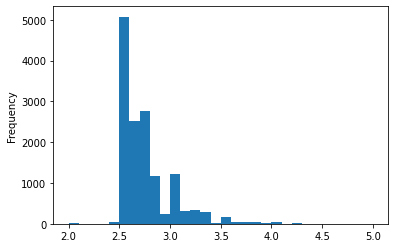

In [23]:
df['ceiling_height'].sort_values().plot(y='ceiling_height', kind='hist', bins=30, range=(2, 5))

Решил пока что оставить большие значения, на гистограмме заметен большой скачок. Медиана и среднее не сильно отличаются из-за выбросов по всей выборке.

In [24]:
df['is_apartment']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
23694    NaN
23695    NaN
23696    NaN
23697    NaN
23698    NaN
Name: is_apartment, Length: 23699, dtype: object

Столбец **is_apartment**, скорее всего, появился относительно недавно. Поэтому там имеются пропуски, заменю значения на булев тип: False.

In [25]:
df['is_apartment'] = df['is_apartment'].fillna(False)

**Вывод**

Данные предобработал, сделал замену типов и прошелся по дубликатам.

## Расчёты и добавление результатов в таблицу

Цена квадратного метра

In [26]:
df['price_per_square_meter'] = df['last_price'] / df['total_area']
df['price_per_square_meter'] = df['price_per_square_meter'].astype('int')

Дни недели

In [27]:
df['weekday_publication'] = df['first_day_exposition'].dt.weekday

Месяц

In [28]:
df['month_publication'] = df['first_day_exposition'].dt.month

Год

In [29]:
df['year_public'] = df['first_day_exposition'].dt.year

In [30]:
def categorization(row):
    total_floors = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'Первый этаж'
    elif floor == total_floors:
        return 'Последний этаж'
    elif 1 < floor < total_floors:
        return 'Другой этаж'

In [31]:
df['floor_category'] = df.apply(categorization, axis=1)

In [32]:
df['useful_area_ratio'] = df['living_area'] / df['total_area']

In [33]:
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

In [34]:
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_publication,month_publication,year_public,floor_category,useful_area_ratio,kitchen_area_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370,3,3,2019,Другой этаж,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920,1,12,2018,Первый этаж,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785,3,8,2015,Другой этаж,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176,4,7,2015,Другой этаж,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000,1,6,2018,Другой этаж,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,95065,0,9,2018,Другой этаж,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155,99195,3,11,2017,Другой этаж,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0,110544,3,4,2019,Другой этаж,NaN,0.263966
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,87454,2,5,2018,Другой этаж,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,88524,6,2,2017,Другой этаж,0.714754,0.106557


## Исследовательский анализ данных

Изучим следующие парметры: площадь, цену, число комнат, высоту потолков и построим гистограммы.

<AxesSubplot:ylabel='Frequency'>

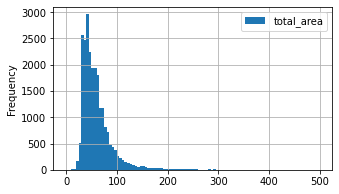

In [35]:
df.plot(y='total_area', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(0, 500))

<AxesSubplot:ylabel='Frequency'>

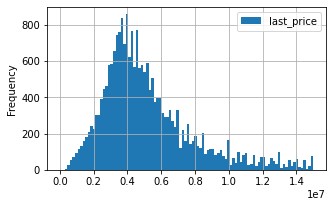

In [36]:
df.plot(y='last_price', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(0, 15000000))

<AxesSubplot:ylabel='Frequency'>

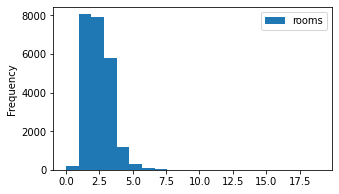

In [37]:
df.plot(y='rooms', kind='hist', bins=20, figsize=(5, 3))

<AxesSubplot:ylabel='Frequency'>

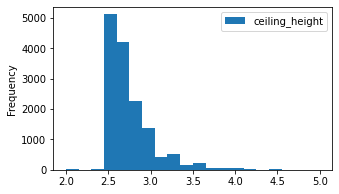

In [38]:
df.plot(y='ceiling_height', kind='hist', bins=20, figsize=(5,3), range=(2, 5))

Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа и когда можно считать, что продажи прошли очень долго или очень быстро.

(1.0, 1000.0)

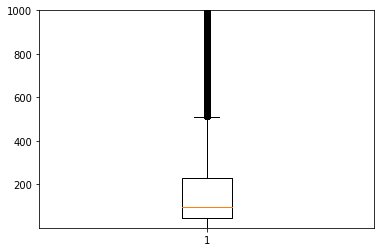

In [39]:
plt.boxplot(df[df['days_exposition'] != 0]['days_exposition'])
plt.ylim(1, 1000)

<AxesSubplot:ylabel='Frequency'>

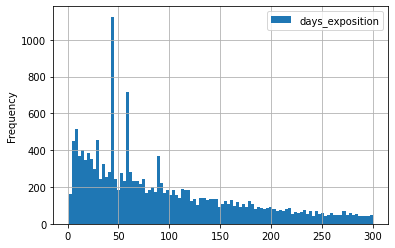

In [40]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,300))

In [41]:
df[df['days_exposition']!=0]['days_exposition'].value_counts()

45      880
60      538
7       234
30      208
90      204
       ... 
1112      1
1080      1
1064      1
1032      1
1391      1
Name: days_exposition, Length: 1141, dtype: int64

In [42]:
df[df['days_exposition']!=0]['days_exposition'].describe().T

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [43]:
df[df['days_exposition']!=0]['days_exposition'].median()

95.0

In [44]:
df[df['days_exposition']!=0]['days_exposition'].value_counts()

45      880
60      538
7       234
30      208
90      204
       ... 
1112      1
1080      1
1064      1
1032      1
1391      1
Name: days_exposition, Length: 1141, dtype: int64

**Вывод:** распределение похоже на распределение Пуассона. Среднее: 180, медиана: 95. Наиболее популярное количество дней: 7, 30, 45, 60, 90 до снятия объявления. Особенностей и связи в этих данных я не увидел, поэтому резонно убрать их для более точного анализа. Попробую построить гистограмму и диаграмму размаха после очистки и посмотреть, как изменится медиана и среднее значение.

Уберём редкие и выбивающиеся значения. Опишем обнаруженные особенности.

In [45]:
clear_dataset = df.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')

In [46]:
percent_of_remaining = (len(clear_dataset) * 100) / len(df)
lost_percent = 100 - percent_of_remaining
lost_percent

22.131735516266502

In [47]:
# Код ревьюера

low_percentele = 0.01
hihg_percentele = 0.99

last_price_low = df['last_price'].quantile(low_percentele)
last_price_high = df['last_price'].quantile(hihg_percentele)

print(f'Нижняя граница last_price {last_price_low}')
print(f'Нижняя граница last_price {last_price_high}')

print(
    'Процент отброшенных значений = ',
    round(
        100 - len(df.query('@last_price_low <= last_price <= @last_price_high'))
        / len(df['last_price']) * 100,
        2
    ),
    '%'
)

Нижняя граница last_price 1000000.0
Нижняя граница last_price 36000000.0
Процент отброшенных значений =  1.95 %


(1.0, 1000.0)

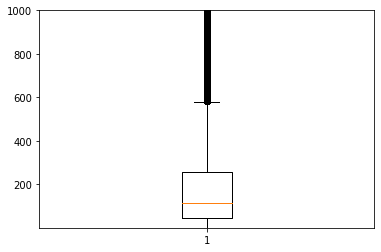

In [48]:
plt.boxplot(clear_dataset['days_exposition'])
plt.ylim(1,1000)

<AxesSubplot:ylabel='Frequency'>

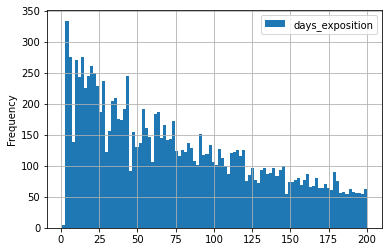

In [49]:
clear_dataset.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

In [50]:
clear_dataset['days_exposition'].value_counts()

4       176
3       158
5       152
14      148
9       143
       ... 
1112      1
1080      1
1064      1
1032      1
1391      1
Name: days_exposition, Length: 1136, dtype: int64

In [51]:
clear_dataset['days_exposition'].mean()

195.80334886745422

In [52]:
clear_dataset['days_exposition'].median()

114.0

**Вывод:** после очистки данных заметно, что медиана и средние стали больше.

Посмотрим на зависимость цены квадратного метра от общей площади квартиры.

In [53]:
total_area_table = df.pivot_table(index = 'total_area', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
total_area_table.columns = ['mean', 'count', 'median']
total_area_table.sort_values('median', ascending = False)

,mean,count,median
total_area,,,
401.00,1000748.0,1,1000748.0
187.50,927302.0,2,927302.0
285.70,857542.0,1,857542.0
268.00,712201.0,1,712201.0
242.40,660000.0,1,660000.0
...,...,...,...
60.96,30347.0,1,30347.0
151.80,28919.0,1,28919.0
28.66,24075.0,1,24075.0


<AxesSubplot:xlabel='total_area'>

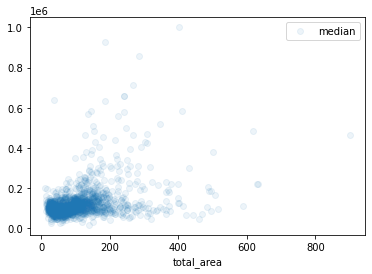

In [54]:
total_area_table.plot(y = 'median', style = 'o', alpha=0.08)

Посмострим на корреляцию с помощью критерия Пирсона

In [55]:
df['total_area'].corr(df['price_per_square_meter'])

0.3019601438779257

**Вывод:** зависимость, как видно по графику, не особо высокая.

Посмотрим на зависимость квадратного метра от числа комнат.

In [56]:
rooms_table = df.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
rooms_table.columns = ['mean', 'count', 'median']
rooms_table.query('count > 50').sort_values('median', ascending = False)

,mean,count,median
rooms,,,
7,163569.491525,59,108827.0
0,108512.730964,197,105555.0
1,100817.830993,8047,100000.0
6,140718.342857,105,99411.0
5,126749.889571,326,96516.5
2,95489.207557,7940,92796.0
4,110331.160169,1180,92666.0
3,97150.694358,5814,88983.0


<AxesSubplot:xlabel='rooms'>

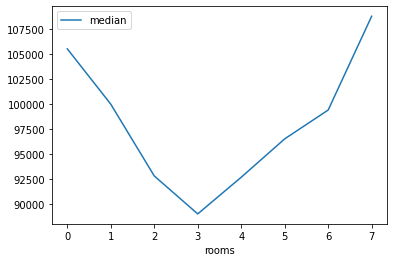

In [57]:
rooms_table.query('count > 50').plot(y = 'median')

**Вывод:** заметно снижение стоимости по мере приближения к трем комнатам.

Посмотрим на зависимость цены квадратного метра от этажа (первого или последнего).

In [58]:
category_floor_table = df.query('floor_category != "Другой этаж"').pivot_table(index = 'floor_category', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
category_floor_table.columns = ['mean', 'count', 'median']

<AxesSubplot:xlabel='floor_category'>

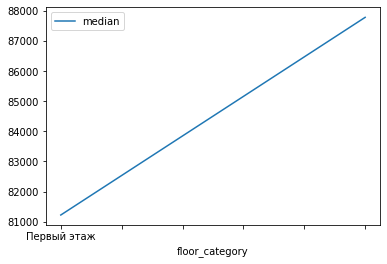

In [59]:
category_floor_table.plot(y = 'median')

**Вывод:** чем выше этаж, тем дороже квартира.

Посмотрим зависимость цены квадратного метра от удалённости центра

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='price_per_square_meter'>

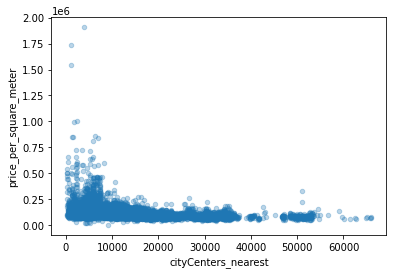

In [60]:
df.plot(kind = 'scatter', y = 'price_per_square_meter', x = 'cityCenters_nearest', alpha = 0.3)

In [61]:
df['cityCenters_nearest'].corr(df['price_per_square_meter'])

-0.31795073682864694

**Вывод:** чем ближе к центру, тем выше стоимость.

Зависимость цены квадратного метра от даты размещения: дня недели, месяца и года.

In [62]:
table_week = df.pivot_table(index = 'weekday_publication', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
table_week.columns = ['mean', 'count', 'median']

In [63]:
table_week.sort_values('median', ascending = False)

,mean,count,median
weekday_publication,,,
1,99734.089410,4183,95634.0
2,99616.731002,3974,95473.0
3,100162.466356,4295,95143.0
0,99437.994463,3612,94688.0
4,99011.697000,4000,94616.0
6,97707.917010,1699,94501.0
5,99017.722107,1936,93545.5


<AxesSubplot:xlabel='weekday_publication'>

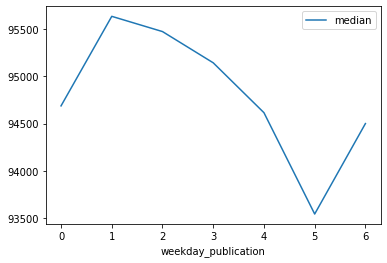

In [64]:
table_week.plot(y = 'median')

**Вывод:** в субботу стоимость самая низкая

In [65]:
table_month = df.pivot_table(index = 'month_publication', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
table_month.columns = ['mean', 'count', 'median']

In [66]:
table_month.sort_values('median', ascending = False)

,mean,count,median
month_publication,,,
4,101948.567045,2379,96451
8,100110.094037,1744,96026
9,100463.814740,1981,95607
11,99230.427246,2371,95588
3,98972.768844,2587,95238
1,99862.139333,1500,95222
2,98768.292045,2640,95000
7,99625.190560,1695,95000
12,99574.280926,1641,94262


<AxesSubplot:xlabel='month_publication'>

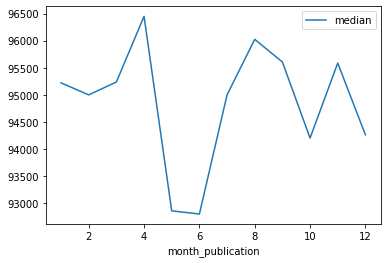

In [67]:
table_month.plot(y = 'median')

**Вывод:** высокая стоимость наблюдается в апреле и в августе.

In [68]:
table_year = df.pivot_table(index = 'year_public', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
table_year.columns = ['mean', 'count', 'median']
table_year.sort_values('median', ascending = False)

,mean,count,median
year_public,,,
2014,124830.000000,137,107000.0
2019,107123.332060,2879,103305.0
2018,97773.107290,8519,95689.0
2015,104613.756507,1191,93414.0
2017,97621.434188,8190,92564.5
2016,98321.900467,2783,91743.0


<AxesSubplot:xlabel='year_public'>

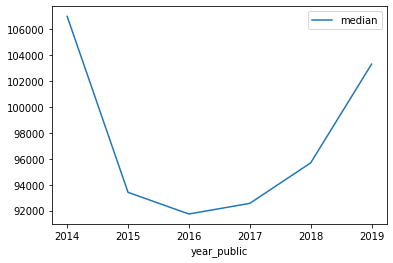

In [69]:
table_year.plot(y = 'median')

**Вывод:** на графике заметно, что цена с 2014-го года начала снижаться, а с 2016 возрастать.

Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [70]:
higher_price = df.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
higher_price.columns = ['count', 'mean']
higher_price = higher_price.sort_values('count', ascending = False).head(10)

In [71]:
higher_price

,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231
посёлок Мурино,522,85751.733716
посёлок Шушары,440,78676.904545
Всеволожск,398,68654.007538
Пушкин,369,103125.373984
Колпино,338,75424.150888
посёлок Парголово,327,90175.489297
Гатчина,307,68745.693811
деревня Кудрово,299,92473.086957


<AxesSubplot:xlabel='locality_name'>

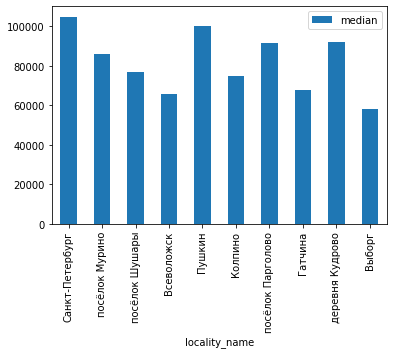

In [72]:
higher_price = df.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean', 'median'])
higher_price.columns = ['count', 'mean', 'median']
higher_price = higher_price.sort_values('count', ascending=False).head(10)
higher_price.plot(y='median', kind='bar')

(0.0, 200000.0)

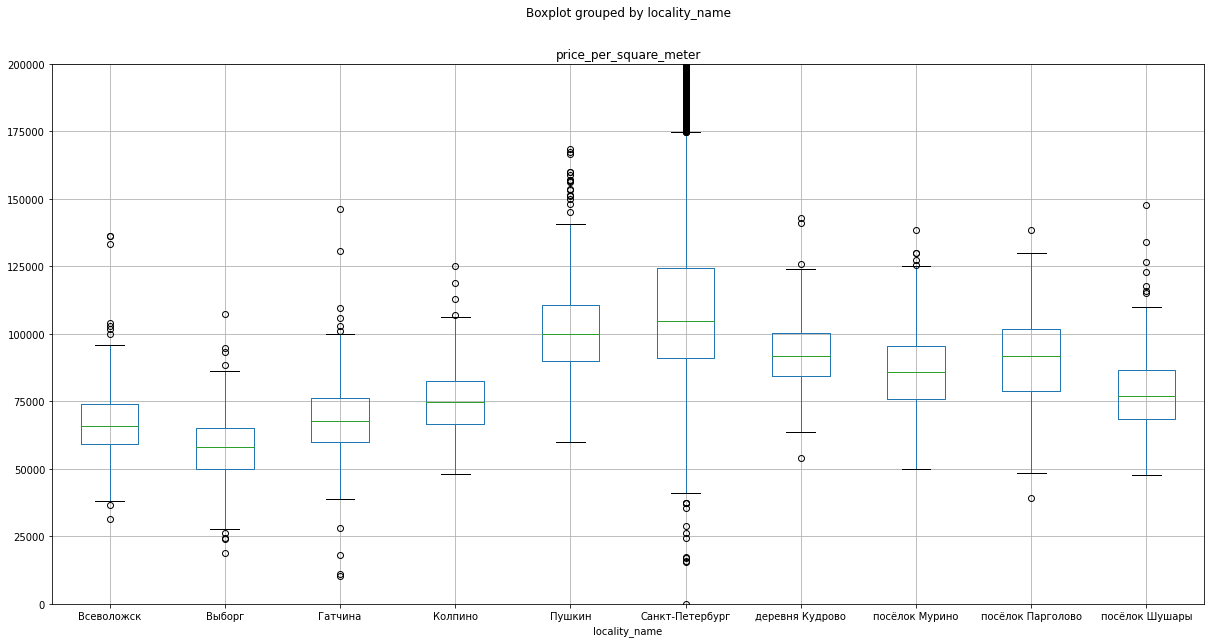

In [73]:
# Код ревьюера

ax = (df
    .query('locality_name in @higher_price.index')
    .boxplot('price_per_square_meter', by='locality_name', figsize=(20, 10))
)
ax.set_ylim(0, 200000)

In [74]:
higher_price[higher_price['mean'] == higher_price['mean'].max()]

,count,mean,median
locality_name,,,
Санкт-Петербург,15721,114848.565231,104761.0


In [75]:
higher_price[higher_price['mean'] == higher_price['mean'].min()]

,count,mean,median
locality_name,,,
Выборг,237,58141.489451,58158.0


**Вывод:** наиболее высокая стоимость в Санкт-Петербурге, а ниболее маленькая в деревне Выборг

Выясняем, какая область входит в центр.

<AxesSubplot:xlabel='cityCenters_nearest_km'>

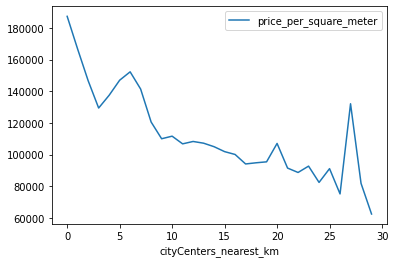

In [76]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].fillna(999999)
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype('int')
kilometers_table = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999999').pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_square_meter', aggfunc = 'mean')
kilometers_table.plot()

**Вывод:** 3 км очень мало для центра крупного города. Дальше видно по графику, что цена падает. В качестве подстраховки возьму 5 км.

Выделим сегмент квартир в центре.

In [77]:
center = df.query('cityCenters_nearest_km <= 5 and locality_name == "Санкт-Петербург"')

In [78]:
center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_publication,month_publication,year_public,floor_category,useful_area_ratio,kitchen_area_ratio,cityCenters_nearest_km
24,8,6500000,97.20,2015-10-31,2,NaN,3.0,46.5,1,False,False,False,19.60,0,Санкт-Петербург,20052.0,2336.0,3.0,411.0,3.0,124.0,265,66872,5,10,2015,Первый этаж,0.478395,0.201646,2
35,6,15500000,149.00,2017-06-26,5,NaN,5.0,104.0,4,False,False,False,17.00,0,Санкт-Петербург,23670.0,3502.0,0.0,NaN,1.0,779.0,644,104026,0,6,2017,Другой этаж,0.697987,0.114094,3
61,18,7990000,74.00,2017-08-24,2,NaN,4.0,43.0,4,False,False,False,20.00,0,Санкт-Петербург,22568.0,4288.0,1.0,363.0,0.0,NaN,609,107972,3,8,2017,Последний этаж,0.581081,0.270270,4
63,2,20000000,118.00,2018-09-11,3,3.00,9.0,68.0,7,False,False,False,16.00,0,Санкт-Петербург,26055.0,4800.0,1.0,648.0,1.0,779.0,37,169491,1,9,2018,Другой этаж,0.576271,0.135593,4
99,32,9600000,90.00,2017-09-26,4,NaN,5.0,67.0,2,False,False,False,8.00,0,Санкт-Петербург,23277.0,2818.0,0.0,NaN,0.0,NaN,104,106666,1,9,2017,Другой этаж,0.744444,0.088889,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23648,14,10100000,78.00,2017-05-12,3,3.27,5.0,48.6,5,False,False,False,8.20,0,Санкт-Петербург,20933.0,1113.0,1.0,621.0,2.0,117.0,621,129487,4,5,2017,Последний этаж,0.623077,0.105128,1
23664,5,9000000,110.00,2015-12-10,4,3.36,7.0,64.6,5,False,False,False,15.80,0,Санкт-Петербург,26313.0,5016.0,3.0,417.0,1.0,118.0,816,81818,3,12,2015,Другой этаж,0.587273,0.143636,5
23665,11,4250000,47.00,2016-05-20,1,NaN,6.0,18.2,1,False,False,False,14.60,0,Санкт-Петербург,20503.0,4946.0,2.0,624.0,1.0,519.0,131,90425,4,5,2016,Первый этаж,0.387234,0.310638,4
23691,11,9470000,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,False,False,10.60,1,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519,129903,3,10,2016,Другой этаж,0.552812,0.145405,4


Стоимость квадратного метра в зависимости от количества комнат.

In [79]:
center = df.query('cityCenters_nearest_km <= 5 and locality_name == "Санкт-Петербург"')
center = center.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center.columns = ['mean', 'count', 'median']
center.query('count > 50').sort_values('median', ascending = False)

,mean,count,median
rooms,,,
1,155503.955145,379,142307.0
2,144525.480916,786,127719.5
3,141663.006897,870,117267.5
7,167473.411765,51,108827.0
4,132580.255760,434,106860.5
5,143231.782609,207,104026.0
6,140477.815789,76,101580.0


<AxesSubplot:xlabel='rooms'>

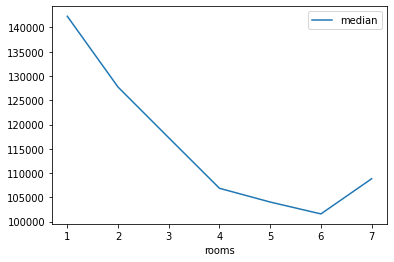

In [80]:
center.query('count > 50').plot(y = 'median')

**Вывод:** обратим внимание на то, что в центре Питера, чем меньше комнат, тем дороже стоимость квадратного метра.

Посмотрим на зависимость стоимости квадратного метра от этажа.

<AxesSubplot:xlabel='floor_category'>

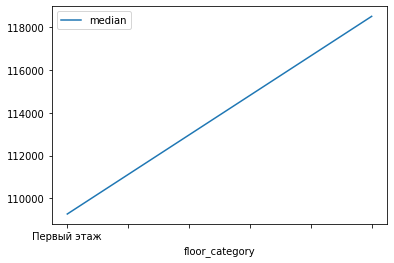

In [81]:
center = df.query('cityCenters_nearest_km <= 5 and locality_name == "Санкт-Петербург"')
floor_depend = center.query('floor_category != "Другой этаж"').pivot_table(index = 'floor_category', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
floor_depend.columns = ['mean', 'count', 'median']
floor_depend.plot(y = 'median')

**Вывод:** квартиры на первом этаже в срденем стоят дешевле, чем на последнем.

Посмотрим на зависимость стоимости квадратного метра от удаленности от центра.

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='price_per_square_meter'>

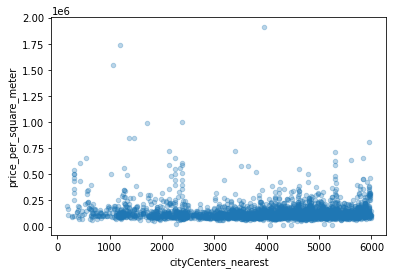

In [82]:
center.plot(kind = 'scatter', y = 'price_per_square_meter', x = 'cityCenters_nearest', alpha = 0.3)

In [83]:
center['cityCenters_nearest'].corr(center['price_per_square_meter'])

-0.06230044184658704

**Вывод:** зависимости особой не наблюдается. Коэффициент корреляции Пирсона низкий и показывет слабую корреляцию величин.

Проверим зависимость стоимости квадратного метра от дня недели размещения объявления.

<AxesSubplot:xlabel='weekday_publication'>

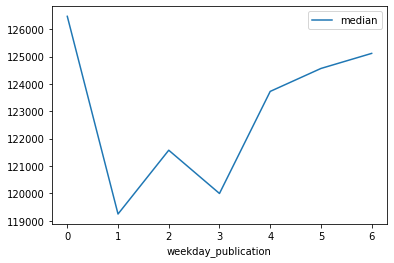

In [84]:
closing_week = center.pivot_table(index = 'weekday_publication', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
closing_week.columns = ['mean', 'count', 'median']
closing_week.plot(y = 'median')

**Вывод:** минимальные цены во вторник и четверг, а максимальные в понедельник и воскресенье.

Проверим зависимость стоимости квадратного метра от месяца размещения объявления.

<AxesSubplot:xlabel='month_publication'>

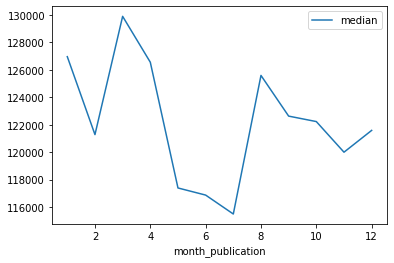

In [85]:
closing_month = center.pivot_table(index = 'month_publication', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
closing_month.columns = ['mean', 'count', 'median']
closing_month.plot(y = 'median')

**Вывод:** март, август имеют самые высокие показатели, меньше всего июль и май.

Посмотрим на зависимость стоимости квадратного метра от года размещения объявления.

<AxesSubplot:xlabel='year_public'>

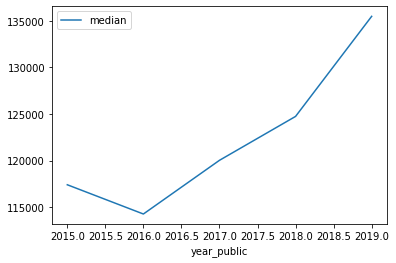

In [86]:
closing_year = center.pivot_table(index = 'year_public', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
closing_year.columns = ['mean', 'count', 'median']
closing_year.query('count > 50').plot(y = 'median')

**Вывод:** с 2016-2017 год цены возрастали.

## Общий вывод

1) В ходе исследования были изучены данные, провёл первичное ознакомление с датасетом.

2) Были выведены приблизительные гипотезы о пропусках данных, заполненны соответствующие пропуски и изменены типы на соответствующие удобочитаемые форматы для последующего анализа и построения графиков. В ходе предобработки данных были выявлены следующие факты: столбец 
**locality_name** имеет пропуски, причина которых не была ясна изначально. Столбец **is_apartment** появился относительно недавно в сравнении с другими столбцами. Параметр **ceiling_height** имел необоснованно большие значения.

3) Далее я подсчитал такие параметры, как: цена квадратного метра, день недели, месяц и год публикации объявления, этаж квартиры (первый, последний и другой), соотношение жилой и общей площади, а также отношение площади кухни к общей. Написал функцию категоризации по этажам, добавил в таблицу.

4) Дальше я провел исследовательский анализ, в ходе которого были выявлены основные факты: площадь, цена, число комнат и высота потолков имели неадекватные значения (0 комнат, высота комнат 1 или 100 метров, а также цена квартиры в 12190 рублей), что говорит нам о том, что нужно уточнить данные у сотрудников, которые предоставили нам данные. Время продажи квартиры имеет распределение Пуассона, аномальные значения: 30, 45, 60, 7, 90. Так как не было найдено значимых особенностей в этих значениях, то было принято решение убрать эти значения и работать с очищенным датасетом. Стоит ещё раз уточник у сотрудников о датах снятия объявления с квартирами, чтобы убедиться в том, что можно исключить из всей генеральной совокупности. Далее изучил зависимости одного параметра от другого и было выявлено, что на стоимость квадратного метра квартиры влияют больше всего количество комнат в квартире, этаж и удаленность от центра. Меньшую значимость в стоимость квартиры вносят такие параметры, как: день, месяц, год и общая площадь квартиры. Также нужно учитывать, что в 2016-2017 годах стоимость квартир в среднем по рынку была ниже на 10-20%, тогда как в центре Санкт-Петербурга данной зависимости от года не обнаружено. В данном случае имело место постоянное удорожание стоимости, начиная с 2015 года по текущий момент. Судя, по резкости изменения цен в зависимости от удаления от центра Санкт-Петербурга, мы выявили центр города в радиусе 5 километров (оптимально для крупного города). Стоит также учитывать, что сегментацию рынка мы не делали, а следовательно, аналогичные квартиры в других городах могли иметь другую ценовую зависимость, о чём нам и говорит проведённый исследовательский анализ.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод